In [2]:
#Importing required packages for visualization and data preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To display visualtizations onto the notebook
%matplotlib inline
plt.style.use('ggplot')

#For Spliting and Training the Data
from sklearn.metrics import r2_score
import sklearn.linear_model as lm
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split


In [3]:
#Loading the dataset
df = pd.read_csv('day.csv')

In [4]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [5]:
#Missing Value Analysis
missing = pd.DataFrame(df.isnull().sum())
missing
#There is no need for imputation since there are no missing values

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
#Distribution Of All Variables
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


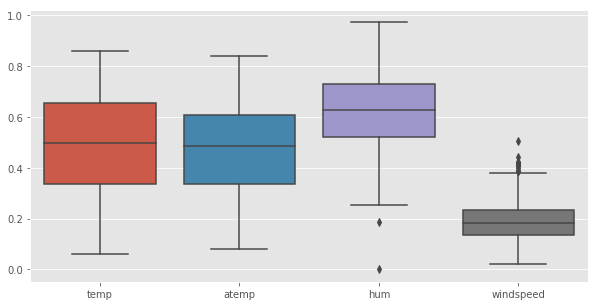

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(ax=ax,data=df[['temp','atemp', 'hum', 'windspeed']])


Text(0.5, 1.0, 'Humidity')

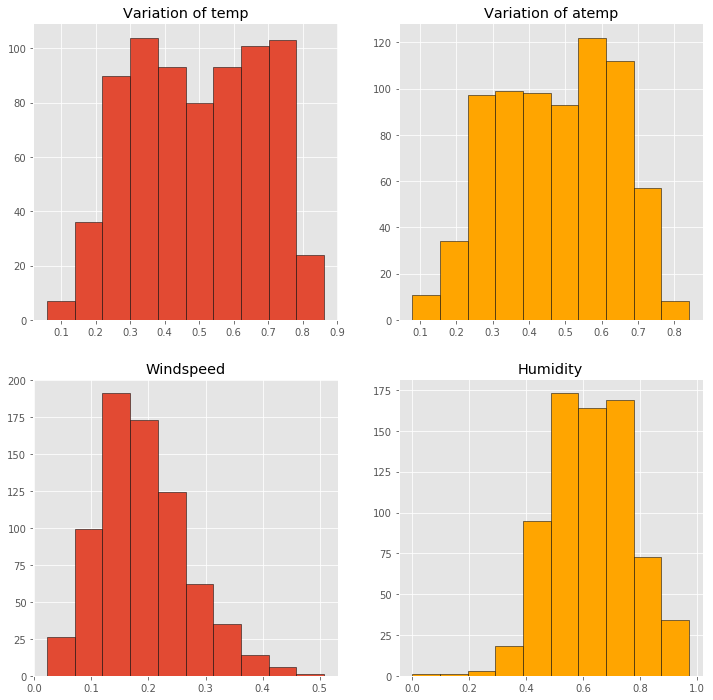

In [8]:
fig, axs = plt.subplots(2, 2,figsize=(12,12))
axs[0, 0].hist(x="temp",data=df,edgecolor="black")
axs[0, 0].set_title("Variation of temp")
axs[0, 1].hist(x="atemp",data=df,edgecolor="black",color= 'orange')
axs[0, 1].set_title('Variation of atemp')
axs[1, 0].hist(x="windspeed",data=df,edgecolor="black")
axs[1, 0].set_title('Windspeed')
axs[1, 1].hist(x="hum",data=df,edgecolor="black",color='orange')
axs[1, 1].set_title('Humidity')

In [9]:
for i in df.columns:
    if(i == 'dteday' or i == 'cnt'):
        continue
    print(i)
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    df =df.drop(df[df.loc[:,i] < min].index)
    df =df.drop(df[df.loc[:,i] > max].index)

instant
-364.0
1096.0
season
0.5
4.5
yr
-1.5
2.5
mnth
-5.0
19.0
holiday
0.0
0.0
weekday
-5.0
11.0
workingday
-1.5
2.5
weathersit
-0.5
3.5
temp
-0.12802012499999998
1.1244788749999999
atemp
-0.06603762500000004
1.012377375
hum
0.20296900000000023
1.0467189999999997
windspeed
-0.013955624999999972
0.381501375
casual
-852.5
2265.5
registered
-839.25
8082.75


Text(0.5, 1.0, 'Humidity')

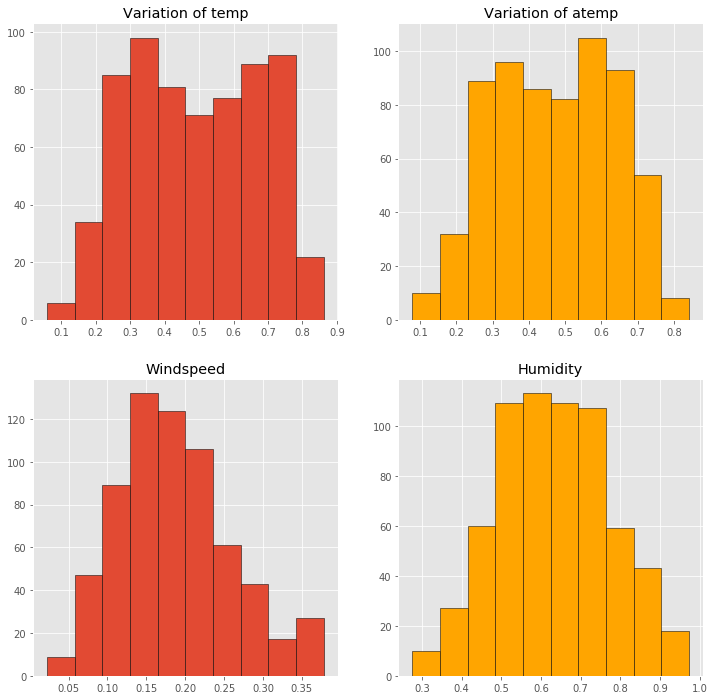

In [10]:
fig, axs = plt.subplots(2, 2,figsize=(12,12))
axs[0, 0].hist(x="temp",data=df,edgecolor="black")
axs[0, 0].set_title("Variation of temp")
axs[0, 1].hist(x="atemp",data=df,edgecolor="black",color= 'orange')
axs[0, 1].set_title('Variation of atemp')
axs[1, 0].hist(x="windspeed",data=df,edgecolor="black")
axs[1, 0].set_title('Windspeed')
axs[1, 1].hist(x="hum",data=df,edgecolor="black",color='orange')
axs[1, 1].set_title('Humidity')

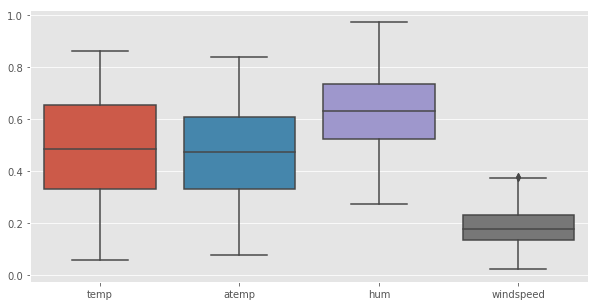

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(ax=ax,data=df[['temp','atemp', 'hum', 'windspeed']])


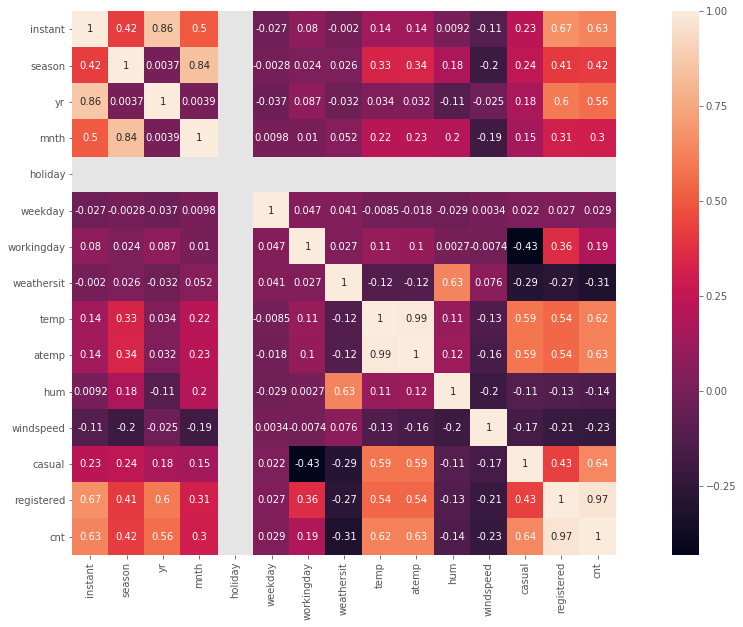

In [12]:
#Generate correlation matrix
corr = df.corr()

f, ax = plt.subplots(figsize=(20, 10))

#Plot using seaborn library
sns.heatmap(ax=ax,data=corr,square=True,annot=True)

In [13]:
df.drop(['instant','holiday','mnth','temp','casual','registered'],axis=1,inplace=True)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('cnt',axis=1),df['cnt'],test_size=0.23)

x_train = x_train.drop('dteday',axis = 1)

In [15]:
def mape(a, b): 
    return np.mean(np.abs(a-b)/a) * 100

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean()) 

r2_score: 0.774718501339716 
MAPE: 16.275854574063715 
Score: 0.8121557675929768 
RMSE: 867.4534419159501


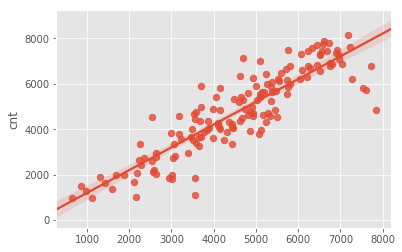

In [16]:
model = lm.LinearRegression().fit(x_train,y_train)
predictions = model.predict(x_test.drop('dteday',axis=1))
print('r2_score:',r2_score(y_test,predictions),'\nMAPE:',
      mape(predictions,y_test),
      '\nScore:',model.score(x_train,y_train),
      '\nRMSE:',rmse(y_test,predictions))
sns.regplot(x = predictions,y = y_test,scatter_kws={"s": 40})

r2_score: 0.795705936059427 
MAPE: 14.24183980378614 
Score: 0.9181587082452551 
RMSE: 826.0594145060323


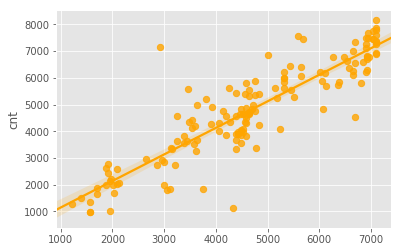

In [27]:
model = RandomForestRegressor(max_depth=5,n_estimators=10).fit(x_train,y_train)

predictions = model.predict(x_test.drop('dteday',axis=1))

print('r2_score:',r2_score(y_test,predictions),
      '\nMAPE:',mape(predictions,y_test),
      '\nScore:',model.score(x_train,y_train),
      '\nRMSE:',rmse(y_test,predictions))

sns.regplot(x = predictions,y = y_test,scatter_kws={"s": 40},color = 'orange')

r2_score: 0.8397995538430132 
MAPE: 12.827347844459643 
Score: 0.980030415389924 
RMSE: 731.5015857356532


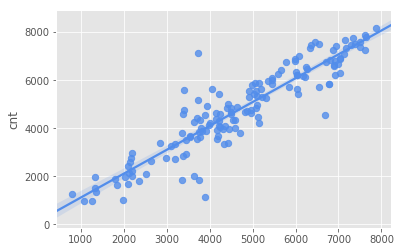

In [30]:
model = BaggingRegressor().fit(x_train,y_train)

predictions = model.predict(x_test.drop('dteday',axis=1))

print('r2_score:',r2_score(y_test,predictions),
      '\nMAPE:',mape(predictions,y_test),'\nScore:',
      model.score(x_train,y_train),'\nRMSE:',
      rmse(y_test,predictions))

sns.regplot(x = predictions,y = y_test,scatter_kws={"s": 40},color = '#528deb')

In [ ]:
result = pd.DataFrame({"Date":x_test['dteday'],"Count":predictions})

In [ ]:
result.isnull().sum()

In [ ]:
result.index = range(0,len(result))

In [ ]:
result.to_csv('result.csv')